## Is there a relationship between price and rating score?

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Set up complete')

# Load data
file_path = '../data/amazon.csv'
amazon_df = pd.read_csv(file_path)

# Top records
amazon_df.head()
amazon_df.shape

Set up complete


(1465, 16)

In [15]:
# Drop rows with missing values
cleaned_data = amazon_df.dropna(subset=['actual_price', 'rating'])

# Remove non-numeric characters
cleaned_data['actual_price'] = cleaned_data['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Ensure 'rating' is numeric
cleaned_data['rating'] = pd.to_numeric(cleaned_data['rating'], errors='coerce')

print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   object 
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [10]:
# Calculate correlation
correlation = cleaned_data['actual_price'].corr(cleaned_data['rating'])
print(f'Correlation between actual price and rating: {correlation:.2f}')


Correlation between actual price and rating: 0.12


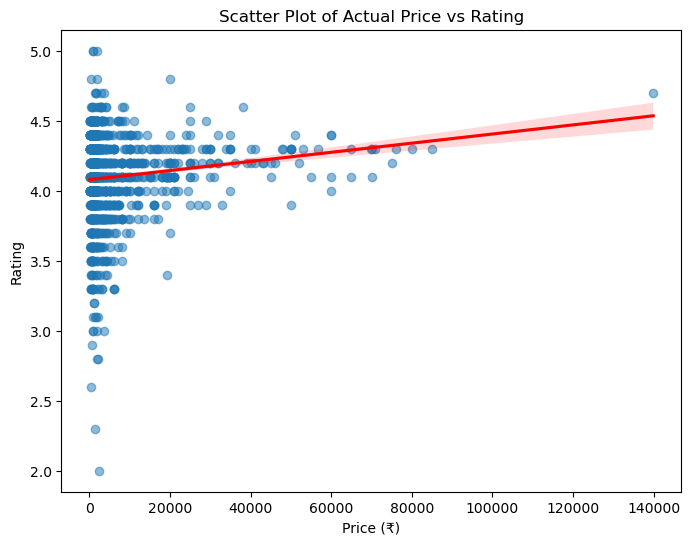

In [11]:
# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='actual_price', y='rating', data=cleaned_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot of Actual Price vs Rating')
plt.xlabel('Price (₹)')
plt.ylabel('Rating')
plt.show()


In [16]:
cleaned_data.describe()

,actual_price,rating
count,1465.000000,1464.000000
mean,5444.990635,4.096585
std,10874.826864,0.291674
min,39.000000,2.000000
25%,800.000000,4.000000
50%,1650.000000,4.100000
75%,4295.000000,4.300000
max,139900.000000,5.000000


## Correlation
Correlation between actual price and rating: `0.12`

- The correlation between rating and price is 0.12 which is a slight positive correlation.
- The range of correlation goes from -1 to 1 and the closer to either end whether that be -1 or 1 means that there is a strong negative correlation to a strong positive correlation, and the close to 0 the more likely there is no correlation at all.

With a correlation of 0.12 that implies that there is a small positive correlation between price and rating, which means there is very little that price and rating have to do with each other.

## Number of Reviews and Ratings

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Set up complete')
    

# Load data
file_path = '../data/amazon.csv'
amazon_df = pd.read_csv(file_path)


# Top records
amazon_df.head()
amazon_df.shape


Set up complete


(1465, 16)

In [19]:
# Drop rows with missing 'rating' or 'rating_count'
cleaned_data = amazon_df.dropna(subset=['rating', 'rating_count'])


# Ensure 'rating' and 'rating_count' are numeric using .loc to avoid warnings
cleaned_data.loc[:, 'rating'] = pd.to_numeric(cleaned_data['rating'], errors='coerce')
cleaned_data.loc[:, 'rating_count'] = pd.to_numeric(cleaned_data['rating_count'], errors='coerce')


# Check the cleaned data
print(cleaned_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1462 non-null   object
 7   rating_count         326 non-null    object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dtypes: object(1

Correlation between number of reviews and ratings:
              rating_count    rating
rating_count      1.000000  0.112141
rating            0.112141  1.000000


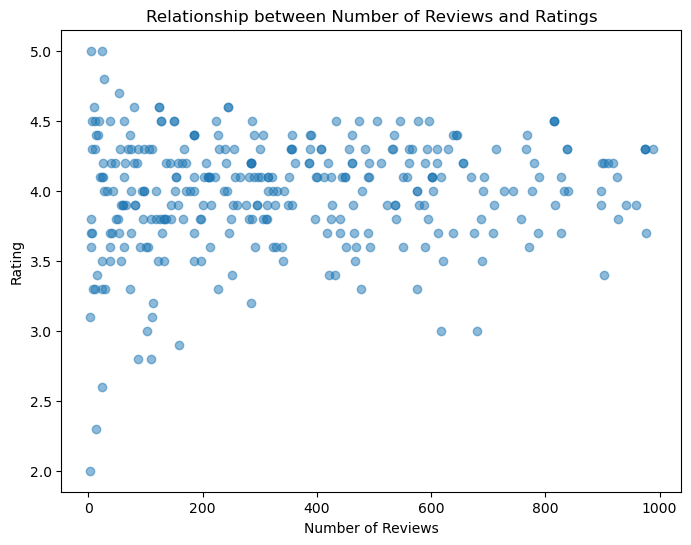

In [20]:
# Correlation between number of reviews and rating
correlation_reviews_ratings = cleaned_data[['rating_count', 'rating']].corr()
print("Correlation between number of reviews and ratings:")
print(correlation_reviews_ratings)


# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_data['rating_count'], cleaned_data['rating'], alpha=0.5)
plt.title('Relationship between Number of Reviews and Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()


In [21]:
cleaned_data.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1463,1463,1463,1463,1463,1463,1462.0,326.0,1463,1463,1463,1463,1463,1463,1463,1463
unique,1349,1335,211,550,449,92,25.0,254.0,1291,1192,1192,1192,1192,1210,1410,1463
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,184.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,231,52,118,56,244.0,4.0,6,10,10,10,10,8,3,1


## Correlation
Correlation between rating count and rating: `0.11`


- The correlation between rating count and rating is 0.11 which is a slight positive correlation.
- The correlation here is even less than the price and the rating score. This means the rating count and rating have even less to do with each other than the rating and price do


With a correlation of 0.11 that implies that there is a small positive correlation between rating count and rating, which means there is very little that they have to do with each other.


